In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 1. Data Source and Contents
The dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset:
- Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]
- Number of attributes (Columns): 7
- Number of instances (Rows): 48,842

In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df = df.drop('capital_gl_bin', axis=1)
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


# 2. Data Quality Analysis (DQA)

In [3]:
def data_quality_analysis(dataframe):
    print('shape:', dataframe.shape)
    print()

    # print column data types
    print('dtypes:')
    print(dataframe.dtypes)
    print()

    # check for missing values
    print('missing values:')
    print(dataframe.isnull().sum())
    print()

    #print('missing values percentages:')
    #print((dataframe.isnull().sum()/len(df))*100)
    
    # print descriptive statistics
    print(dataframe, 'descriptive statistics:')
    print(dataframe.describe())
    
data_quality_analysis(df)

shape: (48842, 10)

dtypes:
hours_per_week_bin    object
occupation_bin        object
msr_bin               object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object

missing values:
hours_per_week_bin    0
occupation_bin        0
msr_bin               0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

      hours_per_week_bin occupation_bin  msr_bin race_sex_bin  \
0               b. 31-40   b. Mid - Low   b. Mid      c. High   
1                a. 0-30        e. High  c. High      c. High   
2               b. 31-40         a. Low   b. Mid      c. High   
3               b. 31-40         a. Low  c. High       b. Mid   
4               b. 31-40        e. High  c. High       a. Low   
...    

- All X columns are stored as strings and need formatting
- No missing values

In [4]:
def col_val_printer(dataframe):
    for col in dataframe.columns:
        unique_values = dataframe[col].unique()
        print(f"{col}: {unique_values}")
        
col_val_printer(df)

hours_per_week_bin: ['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60']
occupation_bin: ['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High']
msr_bin: ['b. Mid' 'c. High' 'a. Low']
race_sex_bin: ['c. High' 'b. Mid' 'a. Low']
education_num_bin: ['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+']
education_bin: ['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High']
workclass_bin: ['b. income' 'a. no income']
age_bin: ['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25']
flag: ['train' 'test']
y: [0 1]


In [5]:
# make a copy of df
df_regex = df.copy()
print()

# list of column names to clean
cols_to_clean = [col for col in df_regex.columns]

# regex pattern to match
pattern = r'^[a-z]\. '

# apply the regex pattern to selected columns
for col in cols_to_clean:
    df_regex[col] = df_regex[col].astype(str).str.replace(pattern, '', regex=True)

print('cleaned unique values:')
col_val_printer(df_regex)


cleaned unique values:
hours_per_week_bin: ['31-40' '0-30' '41-50 & 61-70' '71-100' '51-60']
occupation_bin: ['Mid - Low' 'High' 'Low' 'Mid - Mid' 'Mid - High']
msr_bin: ['Mid' 'High' 'Low']
race_sex_bin: ['High' 'Mid' 'Low']
education_num_bin: ['13' '9-12' '0-8' '14' '15+']
education_bin: ['Bachelors' 'Mid' 'Low' 'Masters' 'High']
workclass_bin: ['income' 'no income']
age_bin: ['36-40 & 56-60' '40-55' '26-30 & 71-100' '31-35 & 61-70' '0-25']
flag: ['train' 'test']
y: ['0' '1']


hours_per_week_bin:


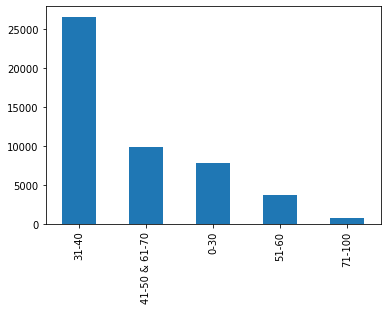

occupation_bin:


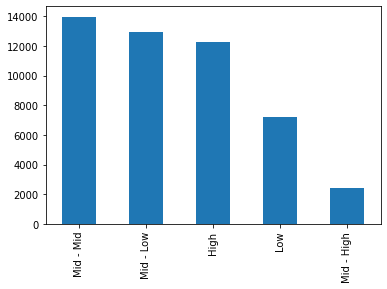

msr_bin:


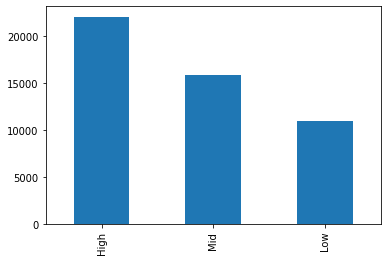

race_sex_bin:


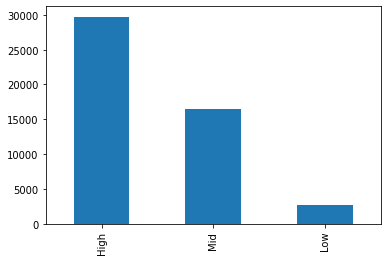

education_num_bin:


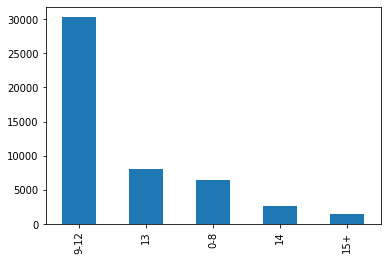

education_bin:


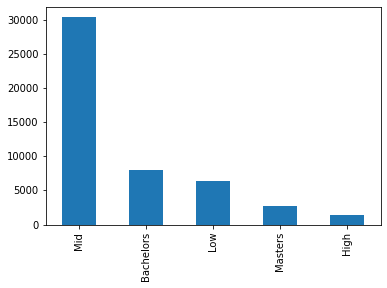

workclass_bin:


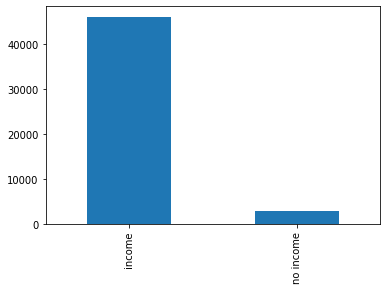

age_bin:


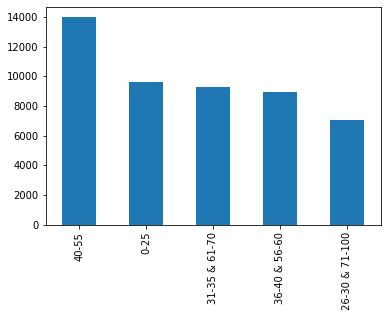

flag:


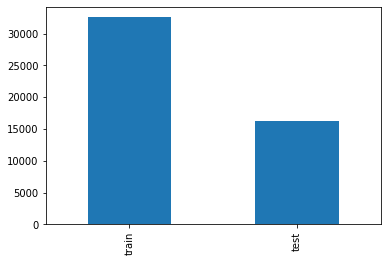

y:


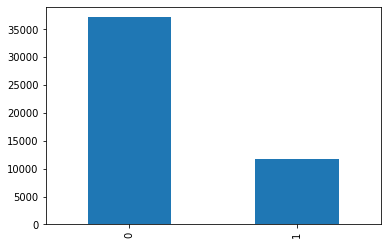

In [6]:
# visualize the distribution of a categorical columns
for col in df_regex.columns:
    print(f"{col}:")
    df_regex[col].value_counts().plot(kind='bar')
    plt.show()

one-hot encoding: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [7]:
# make a copy of df_regex
df_dummies = df_regex.copy()

# list comprehension to include all columns except for 'flag' and 'y'
dummy_columns = [col for col in df_dummies.columns if col not in ['flag', 'y']]

# one-hot encoding
df_dummies = pd.get_dummies(df_dummies, columns=dummy_columns)

# print unique values now that columns are one-hot encoded
col_val_printer(df_dummies)

flag: ['train' 'test']
y: ['0' '1']
hours_per_week_bin_0-30: [0 1]
hours_per_week_bin_31-40: [1 0]
hours_per_week_bin_41-50 & 61-70: [0 1]
hours_per_week_bin_51-60: [0 1]
hours_per_week_bin_71-100: [0 1]
occupation_bin_High: [0 1]
occupation_bin_Low: [0 1]
occupation_bin_Mid - High: [0 1]
occupation_bin_Mid - Low: [1 0]
occupation_bin_Mid - Mid: [0 1]
msr_bin_High: [0 1]
msr_bin_Low: [0 1]
msr_bin_Mid: [1 0]
race_sex_bin_High: [1 0]
race_sex_bin_Low: [0 1]
race_sex_bin_Mid: [0 1]
education_num_bin_0-8: [0 1]
education_num_bin_13: [1 0]
education_num_bin_14: [0 1]
education_num_bin_15+: [0 1]
education_num_bin_9-12: [0 1]
education_bin_Bachelors: [1 0]
education_bin_High: [0 1]
education_bin_Low: [0 1]
education_bin_Masters: [0 1]
education_bin_Mid: [0 1]
workclass_bin_income: [1 0]
workclass_bin_no income: [0 1]
age_bin_0-25: [0 1]
age_bin_26-30 & 71-100: [0 1]
age_bin_31-35 & 61-70: [0 1]
age_bin_36-40 & 56-60: [1 0]
age_bin_40-55: [0 1]


In [8]:
df_dummies

,flag,y,hours_per_week_bin_0-30,hours_per_week_bin_31-40,hours_per_week_bin_41-50 & 61-70,hours_per_week_bin_51-60,hours_per_week_bin_71-100,occupation_bin_High,occupation_bin_Low,occupation_bin_Mid - High,...,education_bin_Low,education_bin_Masters,education_bin_Mid,workclass_bin_income,workclass_bin_no income,age_bin_0-25,age_bin_26-30 & 71-100,age_bin_31-35 & 61-70,age_bin_36-40 & 56-60,age_bin_40-55
0,train,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,train,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,train,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,train,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,train,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,test,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
48838,test,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
48839,test,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
48840,test,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
# convert 'y' column to integer
df_dummies['y'] = df_dummies['y'].astype(int)

# data quality analysis on df_dummies
data_quality_analysis(df_dummies)

shape: (48842, 35)

dtypes:
flag                                object
y                                    int64
hours_per_week_bin_0-30              uint8
hours_per_week_bin_31-40             uint8
hours_per_week_bin_41-50 & 61-70     uint8
hours_per_week_bin_51-60             uint8
hours_per_week_bin_71-100            uint8
occupation_bin_High                  uint8
occupation_bin_Low                   uint8
occupation_bin_Mid - High            uint8
occupation_bin_Mid - Low             uint8
occupation_bin_Mid - Mid             uint8
msr_bin_High                         uint8
msr_bin_Low                          uint8
msr_bin_Mid                          uint8
race_sex_bin_High                    uint8
race_sex_bin_Low                     uint8
race_sex_bin_Mid                     uint8
education_num_bin_0-8                uint8
education_num_bin_13                 uint8
education_num_bin_14                 uint8
education_num_bin_15+                uint8
education_num_bin_9-12    

Training and Test Data: There is a column indicating the rows to be used as “Training Data” and “Testing Data”. You can programmatically create your Training and Testing datasets as separate dataframes in your code based on this column value.

In [10]:
# partition df_dummies in two by train/test in flag column
df_train = df_dummies.loc[df_dummies['flag'] == 'train']
df_test = df_dummies.loc[df_dummies['flag'] == 'test']

# print unique values within flag column in both dataframes
print('train-flag unique values:', df_train['flag'].unique())
print('test-flag unique values:', df_test['flag'].unique())

# drop flag column altogether in both dataframes
df_train_no_flag = df_train.drop('flag', axis=1)
df_test_no_flag = df_train.drop('flag', axis=1)

print()

# test whether the column is still in both dataframes
print('no flag column in df_train_no_flag?:', 'flag' not in df_train_no_flag.columns)
print('no flag column in df_test_no_flag?:', 'flag' not in df_test_no_flag.columns)

train-flag unique values: ['train']
test-flag unique values: ['test']

no flag column in df_train_no_flag?: True
no flag column in df_test_no_flag?: True


# 3. Build Decision Tree Classifier Models

In [11]:
# manually train, test, splitting
X_train = df_train_no_flag.drop('y', axis=1)
y_train = df_train_no_flag.y

X_test = df_test_no_flag.drop('y', axis=1)
y_test = df_test_no_flag.y

In [12]:
# import Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10,
                               random_state=101,
                               max_features=None,
                               min_samples_leaf=15)

**random_state:** This is a number you choose arbitrarily. It’s also called “Random Seed”. If you use a number for this parameter (any number), it ensures that if you run the program multiple times, it will generate the same randomness. Hence, the solution becomes more “reproduceable”.

In [13]:
print('fitting train data...')
dtree.fit(X_train, y_train)
print('training completed.')

print()

print('predicting test output...')
y_pred = dtree.predict(X_test)
print('prediction completed.')

fitting train data...
training completed.

predicting test output...
prediction completed.


# 4. Evaluate Decision Tree Performance
Calculate the performance by comparing `y_pred` against `y_test`.

## Accuracy

In [14]:
# import libraries
from sklearn.metrics import accuracy_score

# print accuracy
print('accuracy score:', accuracy_score(y_test, y_pred))

accuracy score: 0.8375664138079297


## Confusion Matrix

In [15]:
# import libraries
from sklearn.metrics import confusion_matrix

# print confusion matrix
cm_table = confusion_matrix(y_test, y_pred)
print('confusion matrix:')
print(cm_table)

confusion matrix:
[[22799  1921]
 [ 3368  4473]]


## Classification Report

In [16]:
# import libraries
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     24720
           1       0.70      0.57      0.63      7841

    accuracy                           0.84     32561
   macro avg       0.79      0.75      0.76     32561
weighted avg       0.83      0.84      0.83     32561



## Area Under Curve (AUC)

test_auc 0.7463762975835674


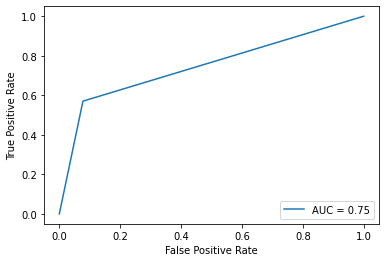

In [17]:
# import libraries
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve

# calculate ROC AUC score
test_auc = roc_auc_score(y_test, y_pred)
print('test_auc', test_auc)

# plot ROC curve (used ChatGPT to generate this code)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=test_auc)
roc_display.plot()
plt.show()

# 5. Tune Decision Tree Performance
Learn about all hyper-parameters and methods of Scikit Learn DecisionTreeClassifier algorithm at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [18]:
# pip install tabulate package to create tables
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [35]:
'''
Function that takes the decision tree hyperparameter of choice
and the list containing test hyperparameter values to loop through
as inputs and prints a table with evaluation metrics for each element
in list and also prints out the best value per metric at the bottom
'''

# install library that creates tables
from tabulate import tabulate

def hyperparameter_testing(hyperparameter,
                           hyper_parameter_value_list,
                           criterion_value = 'gini',
                           min_samples_leaf_value = 1,
                           max_features_value = None,
                           max_depth_value = None):
    
    headers = [hyperparameter, "Accuracy", "Recall", "Precision", "F1 Score"]
    table = []
    
    best_accuracy = 0.0
    best_recall = 0.0
    best_precision = 0.0
    best_f1 = 0.0
    
    best_hyperparameter_a = None
    best_hyperparameter_r = None
    best_hyperparameter_p = None
    best_hyperparameter_f = None

    for value in hyper_parameter_value_list:
        
        if hyperparameter == 'criterion':
            model = DecisionTreeClassifier(criterion=value,
                                           min_samples_leaf=int(min_samples_leaf_value),
                                           max_features=max_features_value,
                                           max_depth=max_depth_value,
                                           random_state=101)
        elif hyperparameter == 'min_samples_leaf':
            model = DecisionTreeClassifier(criterion=criterion_value,
                                           min_samples_leaf=value,
                                           max_features=max_features_value,
                                           max_depth=max_depth_value,
                                           random_state=101)
        elif hyperparameter == 'max_features':
            model = DecisionTreeClassifier(criterion=criterion_value,
                                           min_samples_leaf=int(min_samples_leaf_value),
                                           max_features=value,
                                           max_depth=max_depth_value,
                                           random_state=101)
        elif hyperparameter == 'max_depth':
            model = DecisionTreeClassifier(criterion=criterion_value,
                                           min_samples_leaf=int(min_samples_leaf_value),
                                           max_features=max_features_value,
                                           max_depth=value,
                                           random_state=101)
        else:
            raise ValueError("Invalid hyperparameter value")
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = np.mean(y_test==y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        row = [value, accuracy, recall, precision, f1]
        table.append(row)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameter_a = value
        if recall > best_recall:
            best_recall = recall
            best_hyperparameter_r = value
        if precision > best_precision:
            best_precision = precision
            best_hyperparameter_p = value
        if f1 > best_f1:
            best_f1 = f1
            best_hyperparameter_f = value

    print(tabulate(table, headers=headers, floatfmt=".4f"))

    print()
    print(f"Best for accuracy: {best_hyperparameter_a} - Best accuracy: {best_accuracy:.4f}")
    print(f"Best for recall: {best_hyperparameter_r} - Best recall: {best_recall:.4f}")
    print(f"Best for precision: {best_hyperparameter_p} - Best precision: {best_precision:.4f}")
    print(f"Best for F1 score: {best_hyperparameter_f} - Best F1 score: {best_f1:.4f}")
    
    hyper_param_values = [row[0] for row in table]
    accuracies = [row[1] for row in table]

    plt.plot(hyper_param_values, accuracies)
    plt.xlabel(hyperparameter)
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs {hyperparameter}')
    plt.show()

## Run #1: `criterion`

criterion      Accuracy    Recall    Precision    F1 Score
-----------  ----------  --------  -----------  ----------
gini             0.8462    0.5666       0.7339      0.6395
entropy          0.8462    0.5666       0.7339      0.6395

Best for accuracy: gini - Best accuracy: 0.8462
Best for recall: gini - Best recall: 0.5666
Best for precision: gini - Best precision: 0.7339
Best for F1 score: gini - Best F1 score: 0.6395


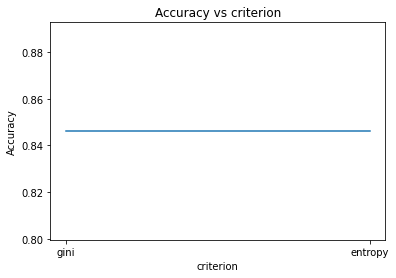

In [36]:
hyperparameter_testing('criterion', ['gini', 'entropy'])

## Run #2: `min_sample_leaf_options`

  min_samples_leaf    Accuracy    Recall    Precision    F1 Score
------------------  ----------  --------  -----------  ----------
            5.0000      0.8415    0.5580       0.7206      0.6290
           10.0000      0.8393    0.5498       0.7171      0.6224
           15.0000      0.8383    0.5481       0.7140      0.6202
           20.0000      0.8373    0.5415       0.7139      0.6159
           25.0000      0.8369    0.5433       0.7113      0.6161
           30.0000      0.8369    0.5462       0.7095      0.6172
           35.0000      0.8364    0.5443       0.7087      0.6157
           40.0000      0.8364    0.5411       0.7104      0.6143

Best for accuracy: 5 - Best accuracy: 0.8415
Best for recall: 5 - Best recall: 0.5580
Best for precision: 5 - Best precision: 0.7206
Best for F1 score: 5 - Best F1 score: 0.6290


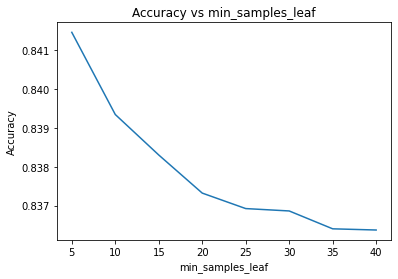

In [37]:
min_sample_leaf_options = np.arange(5, 45, 5)
#print(min_sample_leaf_options)

hyperparameter_testing('min_samples_leaf', min_sample_leaf_options, criterion_value = 'gini')

## Run #3: `max_features`

  max_features    Accuracy    Recall    Precision    F1 Score
--------------  ----------  --------  -----------  ----------
        0.3000      0.8389    0.5418       0.7201      0.6183
        0.4000      0.8403    0.5633       0.7132      0.6295
        0.5000      0.8409    0.5631       0.7158      0.6303
        0.6000      0.8409    0.5552       0.7200      0.6269
        0.7000      0.8415    0.5589       0.7201      0.6293
        0.8000      0.8415    0.5566       0.7217      0.6285

Best for accuracy: 0.8 - Best accuracy: 0.8415
Best for recall: 0.4 - Best recall: 0.5633
Best for precision: 0.8 - Best precision: 0.7217
Best for F1 score: 0.5 - Best F1 score: 0.6303


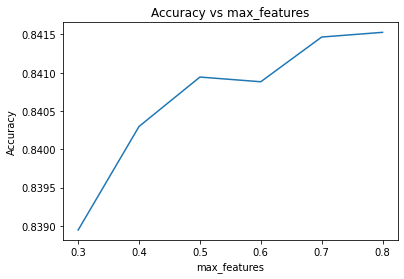

In [40]:
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
#print(max_features_options)

hyperparameter_testing('max_features', max_features_options, min_samples_leaf_value = 5)

## Run 4: `max_depth`

  max_depth    Accuracy    Recall    Precision    F1 Score
-----------  ----------  --------  -----------  ----------
     2.0000      0.8142    0.4036       0.6974      0.5113
     4.0000      0.8238    0.4281       0.7282      0.5392
     6.0000      0.8289    0.4645       0.7264      0.5666
     8.0000      0.8365    0.5011       0.7356      0.5961
    10.0000      0.8389    0.5508       0.7147      0.6222
    12.0000      0.8393    0.5367       0.7245      0.6166
    14.0000      0.8414    0.5614       0.7183      0.6303
    16.0000      0.8412    0.5595       0.7188      0.6292

Best for accuracy: 14 - Best accuracy: 0.8414
Best for recall: 14 - Best recall: 0.5614
Best for precision: 8 - Best precision: 0.7356
Best for F1 score: 14 - Best F1 score: 0.6303


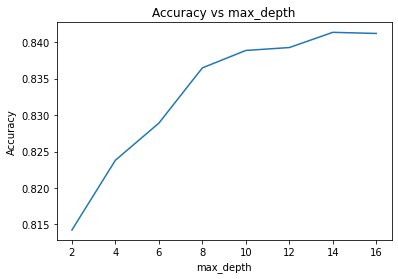

In [39]:
max_depth_options = np.arange(2, 18, 2)
#print(max_depth_options)

hyperparameter_testing('max_depth', max_depth_options,
                       criterion_value = 'gini',
                       min_samples_leaf_value = 5,
                       max_features_value = 0.8)

## Best Decision Tree
- Criterion: Gini
- Minimum Sample Leaf: 5
- Maximum Features: 0.8
- Maximum Depth: 14 to prevent overfitting

# 6. Visualize Your Best Decision Tree using `GraphViz`

In [24]:
%time #prints time complexity of individual cell
# import Decision Tree
from sklearn.tree import DecisionTreeClassifier

best_dtree = DecisionTreeClassifier(criterion='gini',
                                    max_depth=14,
                                    max_features=0.8,
                                    min_samples_leaf=5,
                                    random_state=101)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


In [25]:
# fitting best decision tree on data
print('fitting train data using best decision tree...')
best_dtree.fit(X_train, y_train)
print('training completed.')

print()

print('predicting test output using best decision tree...')
y_pred = best_dtree.predict(X_test)
print('prediction completed.')

fitting train data using best decision tree...
training completed.

predicting test output using best decision tree...
prediction completed.


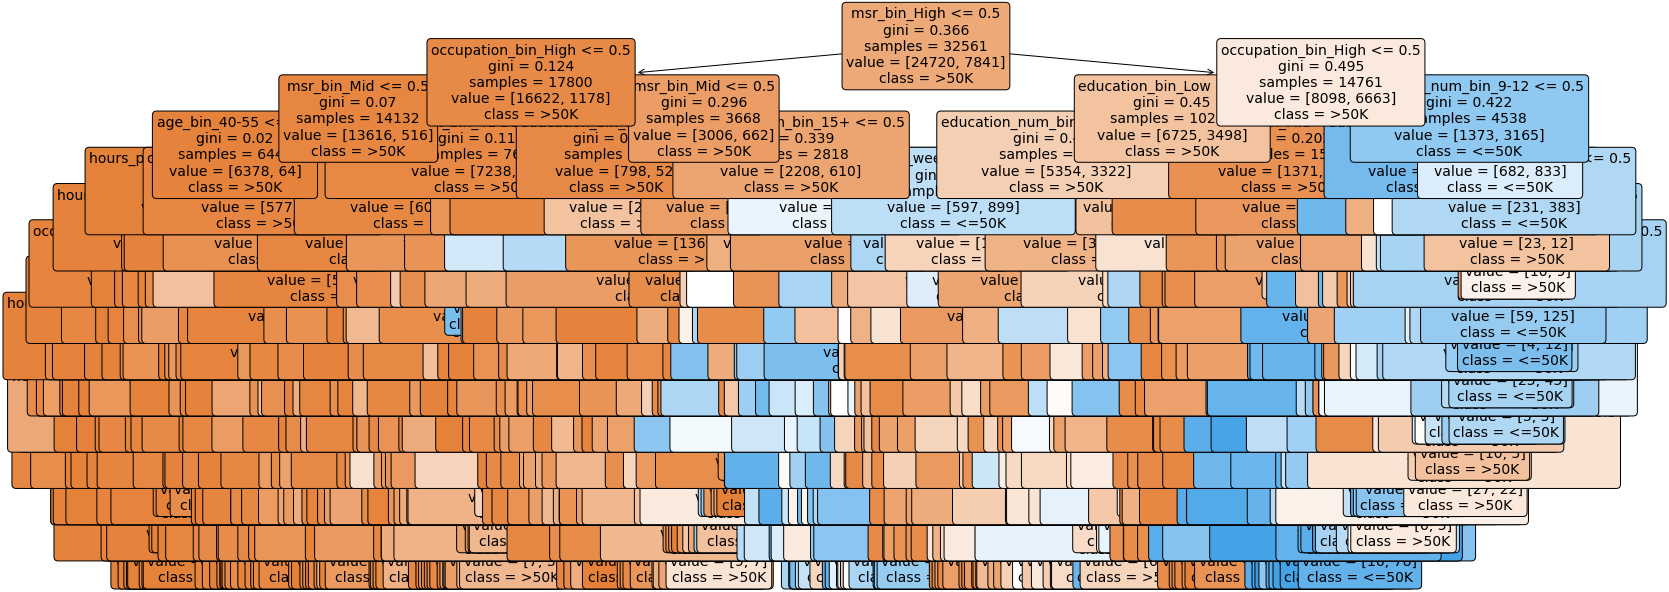

In [26]:
# plot decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

a = plot_tree(best_dtree,
              feature_names=list(X_train),
              class_names=['>50K', '<=50K'], 
              filled=True,
              rounded=True,
              fontsize=14)

# 7. Conclusion

Explain your observations from the above performance tuning effort.

**Q.1 Why does it makes sense to discretize columns for this problem?**

A.1: Because we are trying to solve a binary classification problem and this helps simplify the model as well as increase interpretability

**Q.2 What might be the issues (if any) if we DID NOT discretize the columns.**

A.2:
- The model would have been more susceptible to outliers if they were not handled properly in the pre-processing stage
- We would have had to normalize the columns because they are on different scales and this would have reduced interpretability
- The binned columns would have lost predictive power

**Q.3 Decision Tree Hyper-parameter variation vs. performance**

A.3: In Hyperparameter Tuning, variation is a trade off to performance and vice-versa. The higher the variation, performance becomes more susceptible to new, unseen data.

**Q.4 How long was your total run time to train the best model?**

A.4: 
- CPU times: user 3 µs, sys: 0 ns, total: 3 µs
- Wall time: 7.39 µs

**Q.5 Did you find the BEST TREE?**

A.5: I found the best tree to the best of my abilities. I compared the evaluation metrics for each tested hyperparameter and made sure to keep the best hyperparameter value for each next run

**Q.6 Write your observations from the visualization of the best tree**

A.6: The visualization of my best tree is poor in that it lacks interpretability. I do not know if pruning the model more for the sake of interpretability will affect its predictive power

**Q.7 Will this Tree “overfit”? (Hint: Is this tree “fully grown”)**

A.7: No, because I set max_depth to 14, meaning that it is not fully grown

# 8. Prediction using your “trained” Decision Tree Model
Based on the Performance Tuning effort in the previous section, pick your BEST PERFORMING TREE. Now make prediction of a “new” individual’s Income Category ( <=50K, or >50K ) with the following information. Do this in your Notebook.
- **Hours Worked per Week =** 48
- **Occupation Category =** Mid - Low
- **Marriage Status & Relationships =** High
- **Capital Gain =** Yes
- **Race-Sex Group =** Mid
- **Number of Years of Education =** 12
- **Education Category =** High
- **Work Class =** Income
- **Age =** 58

**Q.8 What is the probability that your prediction for this person is correct?**

A: [[0.41176471 0.58823529]]

In [27]:
# create single-row DataFrame containing data
data = {'hours_per_week_bin': [48],
        'occupation_bin': ['Mid - Low'],
        'msr_bin': ['High'],
        'capital_gl_bin': ['Yes'],
        'race_sex_bin': ['Mid'],
        'education_num_bin': [12],
        'education_bin': ['High'],
        'workclass_bin': ['Income'],
        'age_bin': [58]}

unseen_test_data = pd.DataFrame(data)
unseen_test_data

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,48,Mid - Low,High,Yes,Mid,12,High,Income,58


In [28]:
# get dummies dor unseen_test_data
unseen_test_data_dummies = pd.get_dummies(unseen_test_data, columns=unseen_test_data.columns)

# create a copy of original df_dummies, but getting rid of all records
df_dummies_empty = df_dummies.drop(df_dummies.index)

# merge unseen_test_data_dummies with df_dummies_unseen_data, inserting zeros for missing columns
merged_dataframe = pd.concat([unseen_test_data_dummies, df_dummies_empty], sort=False).fillna(0)

# print the merged dataframe
merged_dataframe = merged_dataframe.drop(['y', 'flag'], axis=1)

print('merged_dataframe columns:')
print(merged_dataframe.columns)
print()
merged_dataframe

merged_dataframe columns:
Index(['hours_per_week_bin_48', 'occupation_bin_Mid - Low', 'msr_bin_High',
       'capital_gl_bin_Yes', 'race_sex_bin_Mid', 'education_num_bin_12',
       'education_bin_High', 'workclass_bin_Income', 'age_bin_58',
       'hours_per_week_bin_0-30', 'hours_per_week_bin_31-40',
       'hours_per_week_bin_41-50 & 61-70', 'hours_per_week_bin_51-60',
       'hours_per_week_bin_71-100', 'occupation_bin_High',
       'occupation_bin_Low', 'occupation_bin_Mid - High',
       'occupation_bin_Mid - Mid', 'msr_bin_Low', 'msr_bin_Mid',
       'race_sex_bin_High', 'race_sex_bin_Low', 'education_num_bin_0-8',
       'education_num_bin_13', 'education_num_bin_14', 'education_num_bin_15+',
       'education_num_bin_9-12', 'education_bin_Bachelors',
       'education_bin_Low', 'education_bin_Masters', 'education_bin_Mid',
       'workclass_bin_income', 'workclass_bin_no income', 'age_bin_0-25',
       'age_bin_26-30 & 71-100', 'age_bin_31-35 & 61-70',
       'age_bin_36-40 & 

,hours_per_week_bin_48,occupation_bin_Mid - Low,msr_bin_High,capital_gl_bin_Yes,race_sex_bin_Mid,education_num_bin_12,education_bin_High,workclass_bin_Income,age_bin_58,hours_per_week_bin_0-30,...,education_bin_Low,education_bin_Masters,education_bin_Mid,workclass_bin_income,workclass_bin_no income,age_bin_0-25,age_bin_26-30 & 71-100,age_bin_31-35 & 61-70,age_bin_36-40 & 56-60,age_bin_40-55
0,1.0,1,1,1.0,1,1.0,1,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
print('X_train column length:', len(X_train.columns))
print('merged_dataframe:', len(merged_dataframe.columns))
print()

diff_columns = set(merged_dataframe.columns) - set(X_train.columns)
print(diff_columns)

X_train column length: 33
merged_dataframe: 38

{'education_num_bin_12', 'capital_gl_bin_Yes', 'hours_per_week_bin_48', 'workclass_bin_Income', 'age_bin_58'}


In [30]:
columns_to_drop = ['age_bin_58', 'hours_per_week_bin_48', 'capital_gl_bin_Yes', 'workclass_bin_Income', 'education_num_bin_12']

merged_dataframe = merged_dataframe.drop(columns_to_drop, axis=1)
merged_dataframe = merged_dataframe.reindex(columns=X_train.columns) #reorder columns in merged_dataframe to the same order in X_train

print('X_train column length:', len(X_train.columns))
print('merged_dataframe:', len(merged_dataframe.columns))
print()

X_train column length: 33
merged_dataframe: 33



In [32]:
# predict test data on best tree fitted model
y_pred = best_dtree.predict(merged_dataframe)
print('predicted class:', y_pred)

print()

y_pred_proba = best_dtree.predict_proba(merged_dataframe)
print('prediction probability:', y_pred_proba)

predicted class: [1]

prediction probability: [[0.41176471 0.58823529]]
